# Bernstein Vazirani Algorithm

In [13]:
! pip install qiskit matplotlib pylatexenc qiskit-aer

### 1st Hadamard

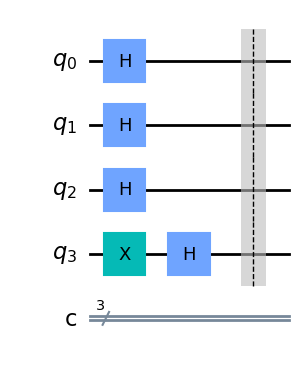

In [20]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import * 

secret = '101'
n = len(secret)

circuit = QuantumCircuit(n+1, n)

circuit.h(range(n))

# f(x) = x * s, serves as our "function"
circuit.x(n)
circuit.h(n)

circuit.barrier()

circuit.draw(output='mpl')

### Unitary

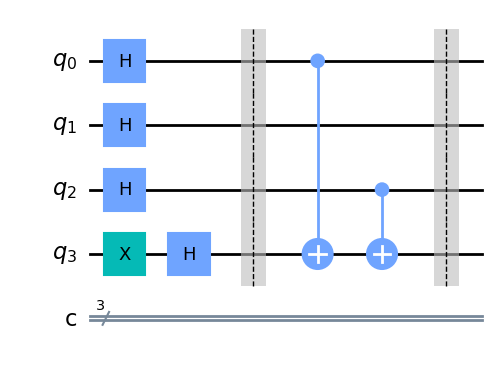

In [21]:

for i, bit in enumerate(reversed(secret)):
	if bit == '1':
		circuit.cx(i, n)
circuit.barrier()
circuit.draw(output="mpl")

### 2nd Hadamard

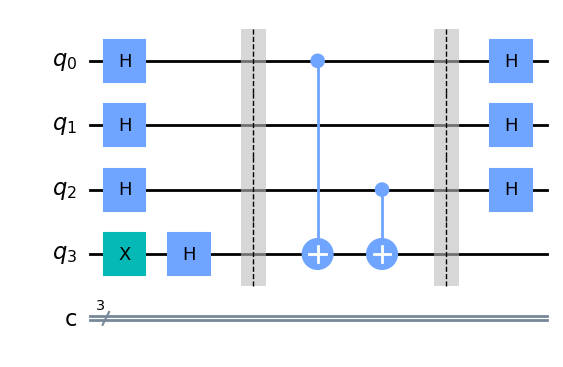

In [22]:
circuit.h(range(n))
circuit.draw(output="mpl")

### Measurement

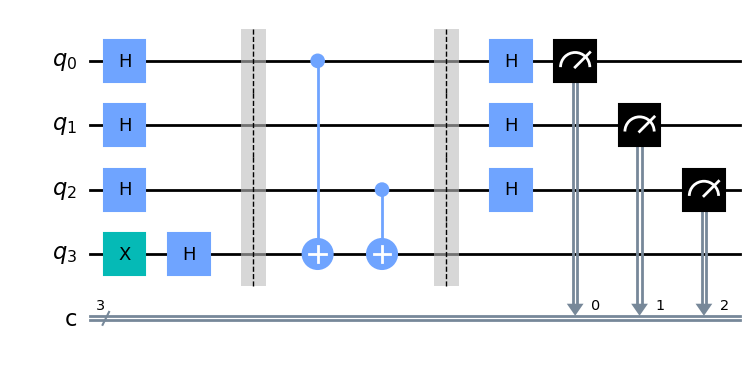

In [23]:
circuit.measure(range(n), range(n))

circuit.draw(output="mpl")

### Run on simulator

{'101': 1}


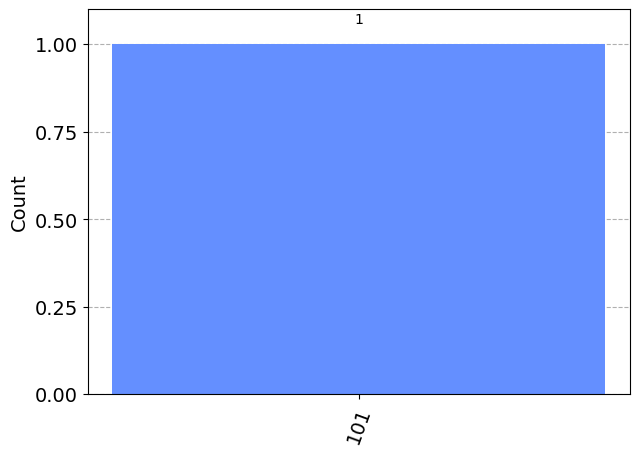

In [24]:
simulator = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

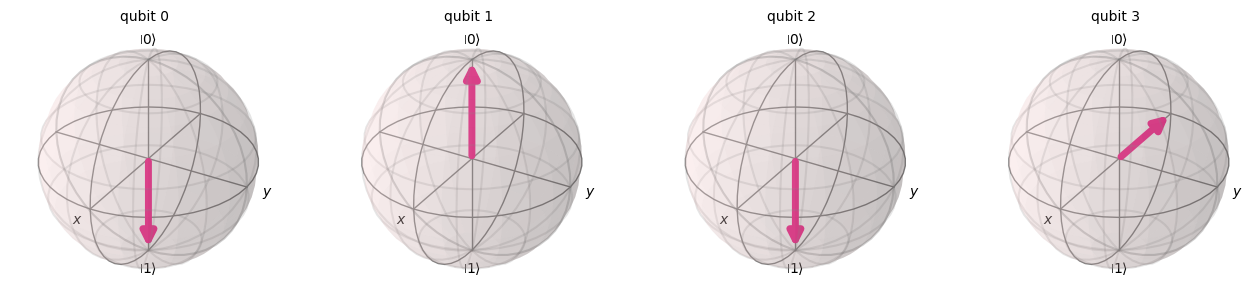

In [25]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(circuit, backend)).result()
psi  = result.get_statevector(circuit)

plot_state_city(psi)
plot_bloch_multivector(psi)